In [2]:
#Case Study:  Testing  Hypothesis

#Hypothesis:  Articles about Climate Change are more likely to be published by "Liberal" sources

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter


In [3]:
#Step 1:  Load data into a dataframe
addr1 = "/Users/Veronica/Documents/DSC550/Week 5/week-5/articles1.csv"
articles = pd.read_csv(addr1)


In [4]:
#Step 2:  check the dimension of the table/look at the data
print("The dimension of the table is: ", articles.shape)

#Display the data
print(articles.head(5))

#what type of variables are in the table 
print("Describe Data")
print(articles.describe())
print("Summarized Data")
print(articles.describe(include=['O']))

#display length of data
print(len(articles))

#display publishers (publications)
print(articles.publication.unique())

#display min, max of years published
print(articles['year'].min())
print(articles['year'].max())

#display how many articles from each year
print(articles['year'].value_counts())




The dimension of the table is:  (50000, 10)
   Unnamed: 0     id                                              title  \
0           0  17283  House Republicans Fret About Winning Their Hea...   
1           1  17284  Rift Between Officers and Residents as Killing...   
2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

      publication                         author        date    year  month  \
0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

   url                        

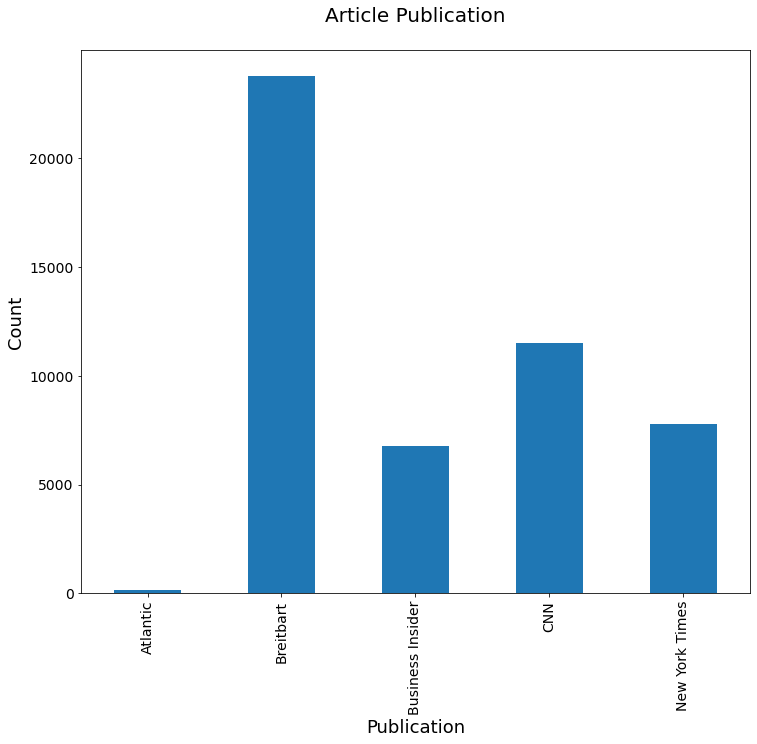

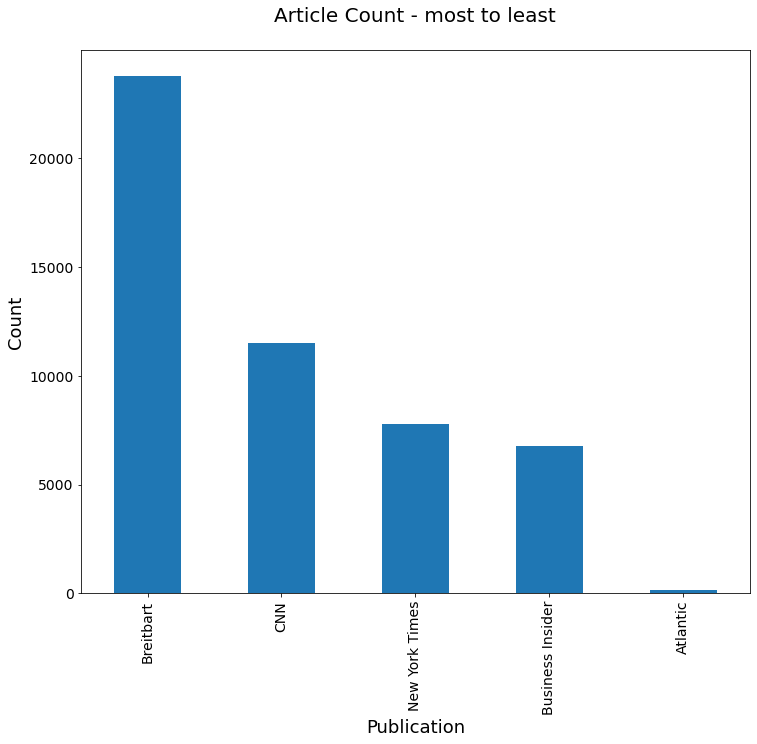

In [6]:
#Step 3:  Create some bar charts to show articles
#display bar chart of articles sorted by Publication Name
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Publication\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

#display bar chart of articles sorted by counts
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()


In [7]:
#Step 4:  clean text:  no punctuation/all lowercase
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
print("clean text:  ",articles['tokenized'].head())

#look at mean, min, max article lengths
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
print("Mean:  ",articles['num_wds'].mean())
print("Min:  ",articles['num_wds'].min())
print("Max:  ",articles['num_wds'].max())



clean text:   0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object
Mean:   636.26046
Min:   0
Max:   24736


In [8]:
#Step 5:  remove articles with no words
len(articles[articles['num_wds']==0])
articles = articles[articles['num_wds']>0]
print("new mean:  ",articles['num_wds'].mean())
print("new min:  ",articles['num_wds'].min())


new mean:   637.0886752778612
new min:   1


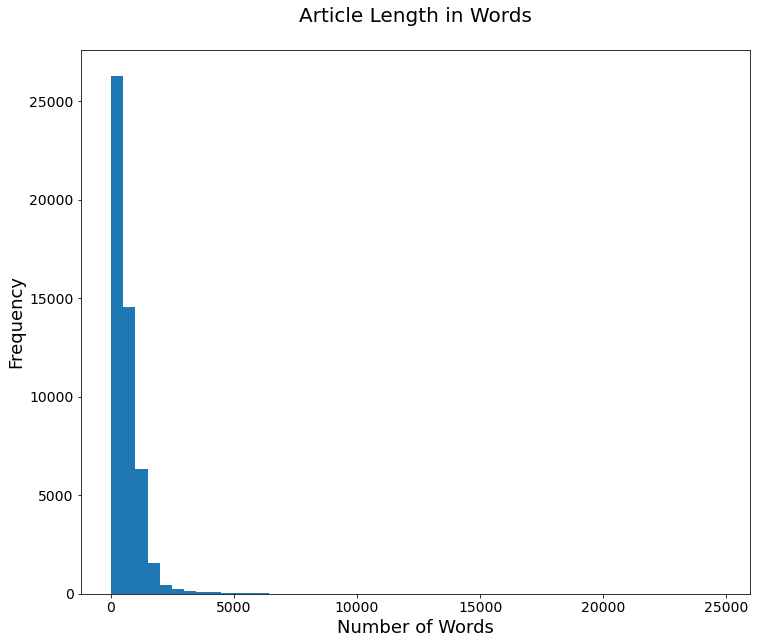

In [9]:
#Step 6:  Check for Outliers:  show bar graph of outliers
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);
plt.show()

